# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
19253,17,?,198797,11th,7,Never-married,?,Own-child,White,Male,0,0,20,Peru,<=50K
21168,43,Private,51506,12th,8,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
28805,63,Self-emp-inc,38472,Some-college,10,Widowed,Sales,Not-in-family,White,Female,14084,0,60,United-States,>50K
7662,40,Self-emp-not-inc,95226,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,<=50K
19997,72,Private,268861,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,99,?,<=50K
22689,26,Private,212748,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
26919,26,Private,192652,Bachelors,13,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
30028,19,Private,39756,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K
9663,35,Private,186845,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
20429,43,Self-emp-not-inc,316820,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,84,United-States,<=50K


1. Importarea librariilor necesare analizelor statistice si crearii graficelor:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.a. Crearea graficelor pentru variabila hours-per-week (distributii, outlieri, skewness):

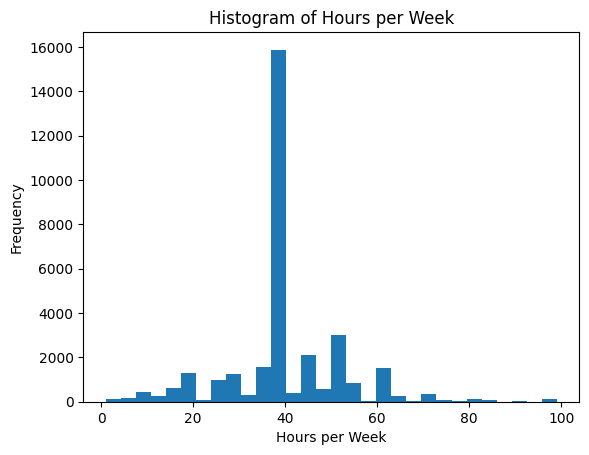

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(data["hours-per-week"], bins=30)
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.title("Histogram of Hours per Week")
plt.show()

Avem o distributie usor asimetrica, insa care respecta, in mare, distributia standard.

In [5]:
mean_hours = data["hours-per-week"].mean()
median_hours = data["hours-per-week"].median()
skewness_hours = data["hours-per-week"].skew()

mean_hours, median_hours, skewness_hours

(np.float64(40.437455852092995),
 np.float64(40.0),
 np.float64(0.227642536804501))

Media si mediana sunt relativ apropiate, iar asimetria este pozitiva, dar destul de mica; confirmand in continuare prezenta unei distributii aproximativ simetrice. 

2. Inspectarea rapida a datelor: dimensiunile setului de date (shape), tipurile de date (info) si analize statistice descriptive (describe):


In [6]:
print("Shape:", data.shape)
data.info()

Shape: (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Scurta interpretare: media datelor pentru variabila hours-per-week este de aprox 40 de ore; abaterea standard, 12.3 ore; avem o plaja de valori larga pentru variabila de varsta; variabilele capital gain si capital loss prezinta posibili outliers (diferente foarte mari intre min si max values).

3. Analizarea valorilor lipsa si raportarea lor:

In [8]:
missing = data.isna().sum()
missing_percentage = (missing / len(data)) * 100

pd.DataFrame({
    "Missing Count": missing,
    "Missing Percentage (%)": missing_percentage
})


,Missing Count,Missing Percentage (%)
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


Nu au fost identificate valori lipsa in setul de date.

4. Identificarea valorilor de tip outlier si prezentarea lor prin grafice boxplot pentru variabilele capital-gain si capital-loss:

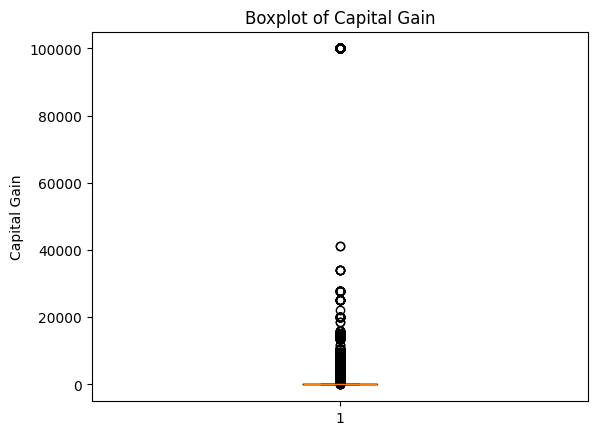

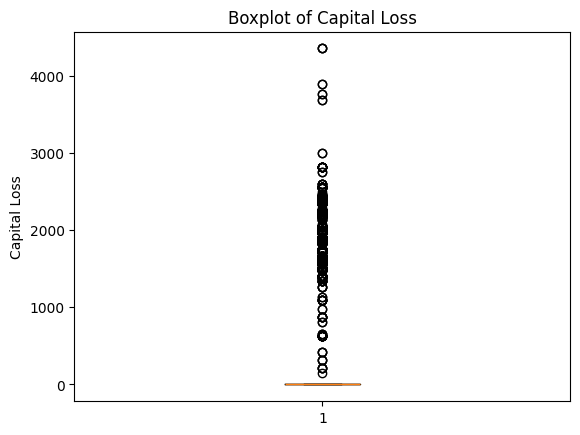

In [9]:
plt.figure()
plt.boxplot(data["capital-gain"].dropna())
plt.ylabel("Capital Gain")
plt.title("Boxplot of Capital Gain")
plt.show()

plt.figure()
plt.boxplot(data["capital-loss"].dropna())
plt.ylabel("Capital Loss")
plt.title("Boxplot of Capital Loss")
plt.show()

In cazul variabilei capital-gain, avem o valoare extrema, 99999; in cazul variabilei capital-loss, avem cateva variabile extreme, in jurul valorii de 4000.

5. Analize optionale - histograme, distributii, corelatii, scatter plots:

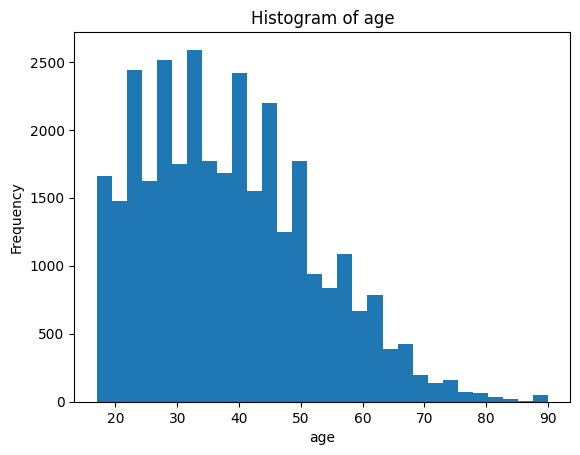

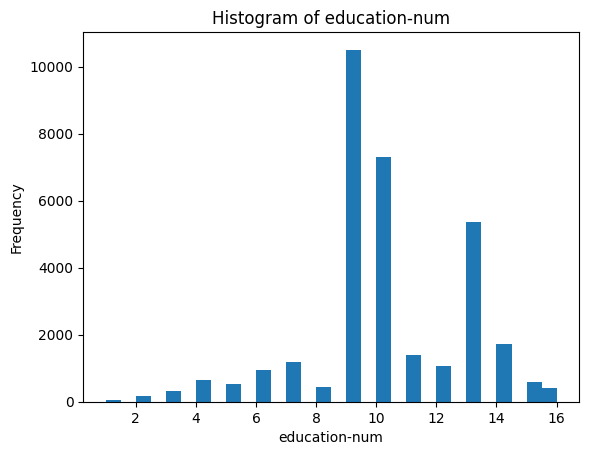

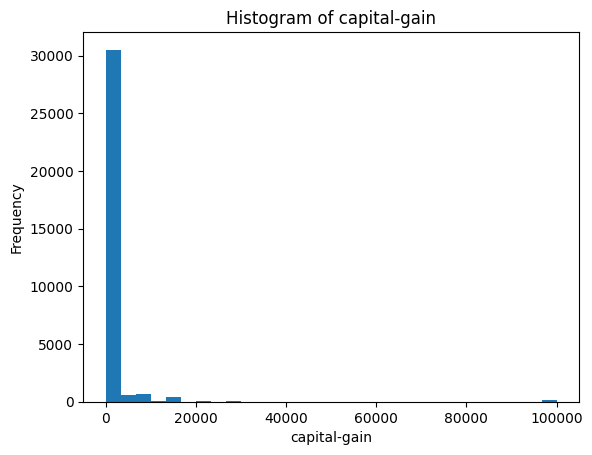

In [10]:
import matplotlib.pyplot as plt

num_columns = ["age", "education-num", "capital-gain"]

for col in num_columns:
    plt.figure()
    plt.hist(data[col].dropna(), bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()


Distributia varstei este asimetrica catre stanga, acesta fiind un lucru relativ obisnuit, cele mai multe valori fiind incluse in intervalul de varsta de pana la 50 de ani. Cele mai semnificative peaks in moduri sunt la varstele 25, 30, 35, 40, 45, 50. Acest lucru nu este o surpriza, intrucat 75% din date includ intervalul de varsta de pana la 48 de ani, conform analizelor descriptive anterioare. 

Distributia nivelului de educatie este asimetrica catrea dreapta, insa cele mai multe valori sunt prezente in mijlocul acesteia si catre coada dreapta a distributiei (cu 3 moduri "peak"). Acest lucru indica un nivel ridicat al educatiei in esantionul inclus. 

Distributia capital-gain este una foarte asimetrica catre dreaptam, unicul mod fiind in cadrul valorii de 10000, aproximativ. 

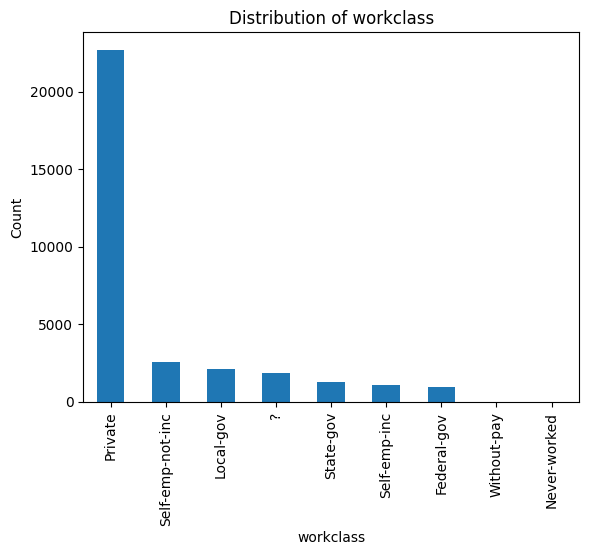

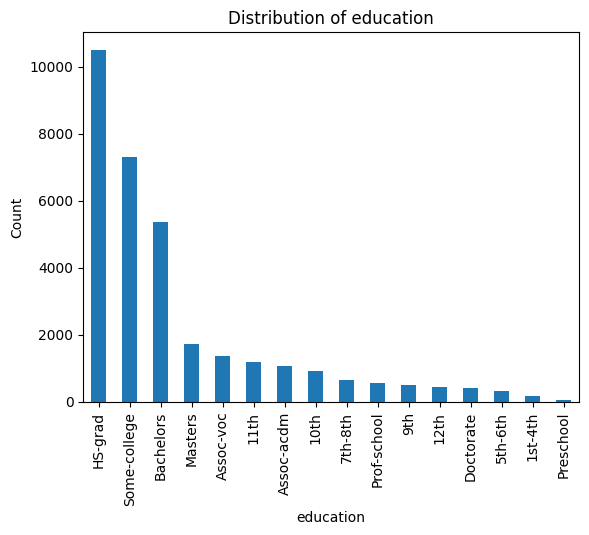

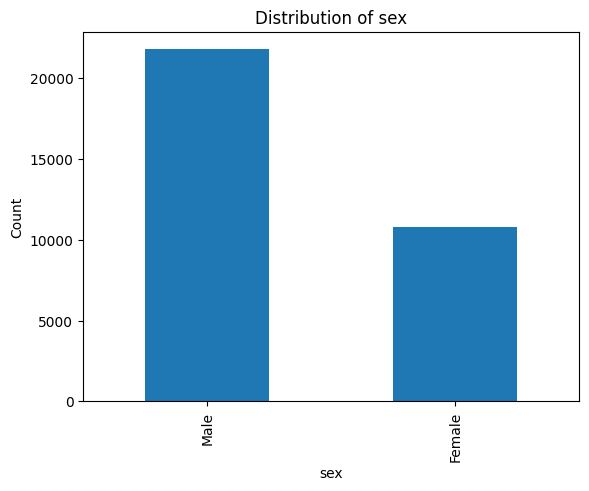

In [11]:
cat_cols = ["workclass", "education", "sex"]

for col in cat_cols:
    plt.figure()
    data[col].value_counts().plot(kind="bar")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.show()


Distributiile pentru educatie si working-class sunt puternic asimetrice de dreapta; in cadrul distributiei working-class, aceasta este unimodala, valorile agregandu-se in special in sectorul privat; pentru distributia educatiei, modul principal este educatia liceala. 

Distributia sexului este bimodala, cum era de asteptat, dar avem asimetrie puternica, intrucat avem un esantion predominant masculin.

In [12]:
corr = data.select_dtypes(include="number").corr()
corr["hours-per-week"].sort_values(ascending=False)


hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
fnlwgt           -0.018768
Name: hours-per-week, dtype: float64

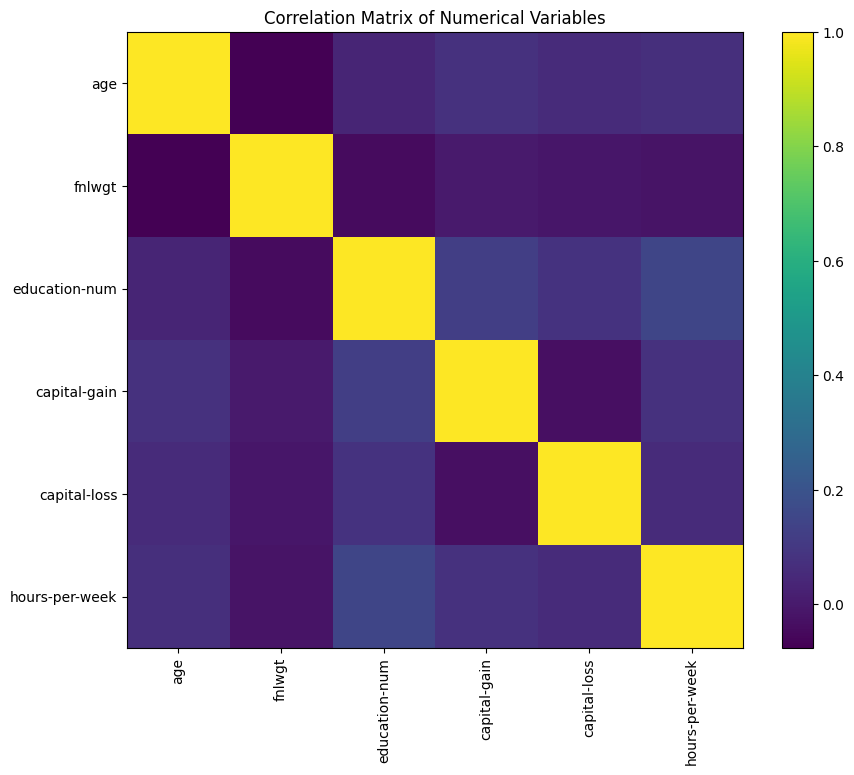

In [13]:
import matplotlib.pyplot as plt
import numpy as np

corr = data.select_dtypes(include="number").corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


Relatiile de asociere intre variabila principala, hours-per-week, si celelalte sunt destul de slabe, cele mai puternice asocieri fiind intre educatie si varsta. Cele mai slabe asocieri sunt intre variabila capital-loss si fnlwgt. Rezultatele obtinute indica faptul ca nicio variabila prezenta in acest dataset poate explica semnificativ numarul de ore lucrate. 

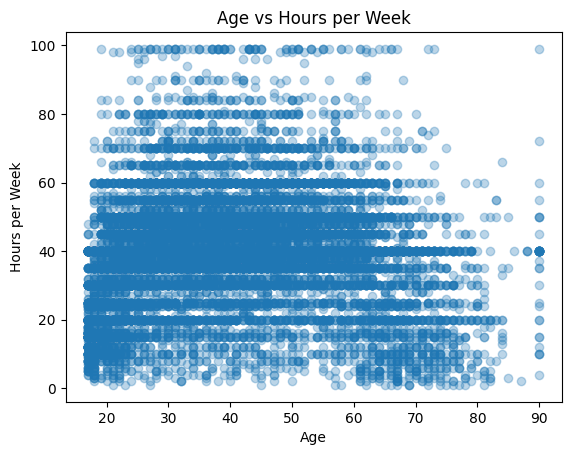

In [14]:
plt.figure()
plt.scatter(data["age"], data["hours-per-week"], alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.title("Age vs Hours per Week")
plt.show()


Nu poate fi identificat un trend foarte clar, valorile fiind foarte dispersate, insa majoritatea valorilor se concentreaza intre 30-50 de ore lucrate pe saptamana, iar cea mai mare densitatea a punctelor se afla in cadrul intervalului 20-40 de ani, aproximativ. Dupa 60 de ani se observa o tendinta de scadere a numarului de ore lucrate. 

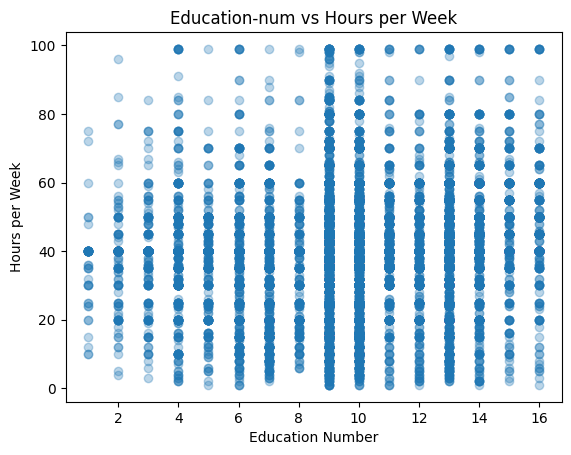

In [15]:
plt.figure()
plt.scatter(data["education-num"], data["hours-per-week"], alpha=0.3)
plt.xlabel("Education Number")
plt.ylabel("Hours per Week")
plt.title("Education-num vs Hours per Week")
plt.show()


In cadrul acestui scatterplot, putem observa o usoara tendinta ascendenta a orelor lucrate cu cat creste nivelul de educatie, in timp ce nivelurile educationale mai joase de prezinta in principiu mai putin de 40 de ore lucrate. Cu toate acestea, avem o dispersie a datelor destul de larga, insa tendintele sunt oarecum mai clare fata de scatter-plot-ul anterior.

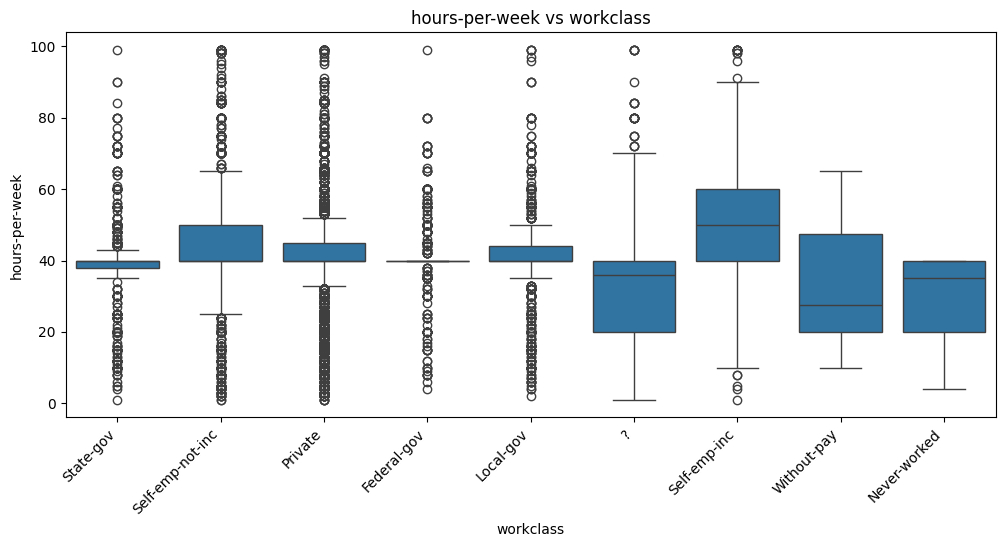

In [16]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x="workclass", y="hours-per-week")
plt.title("hours-per-week vs workclass")
plt.xticks(rotation=45, ha="right")
plt.show()

Graficul box-plot-ului afiseaza o variatie destul de considerabila in orele lucrate, in special in cadrul categoriilor 'self-employed', '?', 'fara plata' si 'niciodata nu a lucrat'. Categoriile guvernamentale (stat, federal, local) prezinta cea mai mare consistenta in numarul orelor lucrate, cu whiskers si cutii inguste, ceea ce indica un program standardizat si putine abateri de la medie. La randul sau, categoria sectorului privat pare destul de consistenta, cu cateva ore in plus decat cei din mediul guvernamental. 

Raport final:

Aceasta analiza exploratorie (EDA) ofera o vedere generala asupra setului de date. 

Distributia target-ului de hours-per-week se concentreaza in jurul valorii de 40 de ore pe saptamana, mediana si media fiind foarte apropiate. Este usor asimtrica catre dreapta, dar nu considerabil.

Cei mai multi outlieri au fost identificati in jurul variabilelor numerice, anume, capital-gain si capital-loss, atat vizual, cat si in una analizelor statistice. 

Rezultatele matricei de corelatie afiseaza corelatii slabe catre moderat, sugerand faptul ca niciuna dintre variabilele numerice incluse nu poate explica de una singura variabila target. 

Aspecte care necesita investigatii indeliate se refera la prezenta outlierilor in setul de date si transformarea acestora, preferabil prin logaritmare (capital gain, capital loss) pentru a reduce influenta acestora. Un alt aspect ce merita investigat se refera la relatia de asociere dintre target-ul hours-per-week si celelalte variabile categorice (statusul relatiei, workclass, ocupatia, etc.). 